In [41]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [52]:
FuelConsumptionCo2_data=np.loadtxt('FuelConsumption.csv', delimiter=',',dtype=str)
ENGINESIZE=np.array(FuelConsumptionCo2_data[1:,4],dtype=np.float64)
CYLINDERS=np.array(FuelConsumptionCo2_data[1:,5],dtype=np.float64)
FUELCONSUMPTION_CITY=np.array(FuelConsumptionCo2_data[1:,8],dtype=np.float64)
FUELCONSUMPTION_HWY=np.array(FuelConsumptionCo2_data[1:,9],dtype=np.float64)
FUELCONSUMPTION_COMB=np.array(FuelConsumptionCo2_data[1:,10],dtype=np.float64)
FUELCONSUMPTION_COMB_MPG=np.array(FuelConsumptionCo2_data[1:,11],dtype=np.float64)
CO2EMISSIONS=np.array(FuelConsumptionCo2_data[1:,12],dtype=np.float64)

In [63]:
class LinearRegression:
    def __init__(self):

        self.coefficients = None

    def fit(self, X, Y):

        #  β0
        X_b = np.c_[np.ones((X.shape[0], 1)), X]

        # β = (X^T X)^(-1) X^T Y
        self.coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ Y

    def predict(self, X_new):

        if self.coefficients is None:
            raise ValueError("The model is not trained yet. Please use the fit() method first.")

        X_new_b = np.c_[np.ones((X_new.shape[0], 1)), X_new]
        return X_new_b @ self.coefficients

    def plot(self, X, Y):
       #2D
        if X.shape[1] == 1:
            plt.scatter(X, Y, color='blue', label='Actual data')
            x_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
            y_line = self.predict(x_line)
            plt.plot(x_line, y_line, color='red', label='Regression line')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.show()
        #3D
        elif X.shape[1] == 2:

            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(X[:, 0], X[:, 1], Y, color='blue', label='Actual data')

            x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
            y_line = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
            z_line = self.predict(np.c_[x_line, y_line])

            ax.plot(x_line, y_line, z_line, color='red', label='Regression line')
            ax.set_xlabel('X1')
            ax.set_ylabel('X2')
            ax.set_zlabel('Y')
            plt.title('Linear Regression - 3D Line')
            plt.legend()
            plt.show()
        else:
            print("Visualization is only supported for 1D or 2D data.")


In [68]:
X=np.array([ENGINESIZE]).T
Y=CO2EMISSIONS

Model coefficients (β): [125.3040995   39.12519979]


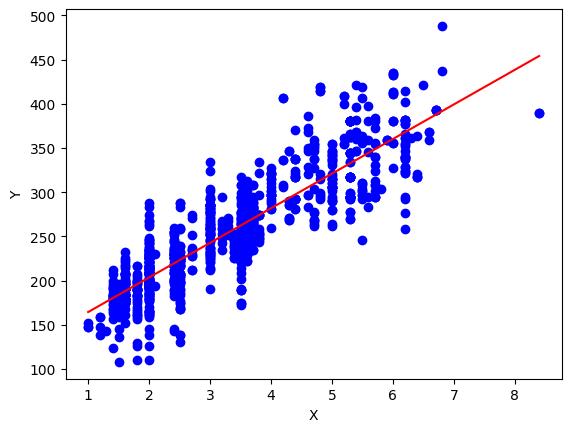

In [69]:
model = LinearRegression()
model.fit(X, Y)
print("Model coefficients (β):", model.coefficients)

model.plot(X, Y)

Model coefficients (β): [108.53955082  28.2453302    9.17586088]


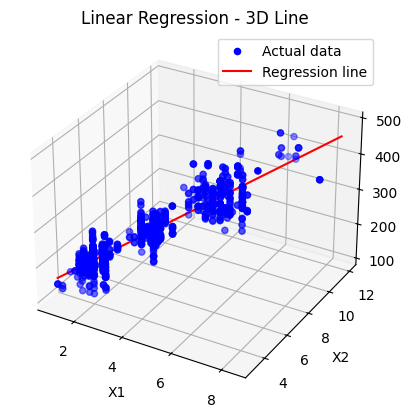

In [70]:
X=np.array([ENGINESIZE,CYLINDERS]).T
model = LinearRegression()
model.fit(X, Y)
print("Model coefficients (β):", model.coefficients)

model.plot(X, Y)